In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


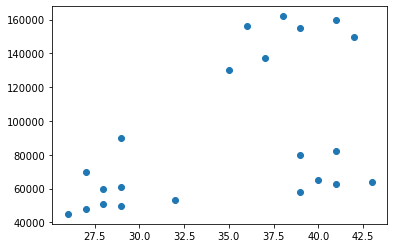

In [3]:
plt.scatter(df.Age,df["Income($)"])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df.drop("Name",axis=1))
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df["cluster"] = y_predicted

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

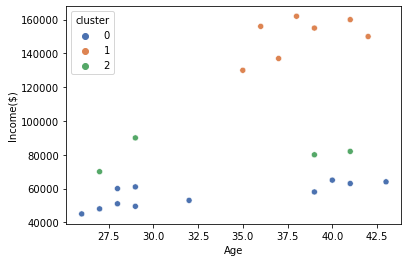

In [7]:
sns.scatterplot(x=df.Age,y=df["Income($)"],hue=df.cluster,palette="deep")

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])

MinMaxScaler()

In [24]:
df['Income($)'] = scaler.fit_transform(df[["Income($)"]])

In [9]:
scaler.fit(df[["Age"]])

MinMaxScaler()

In [10]:
df["Age"] = scaler.transform(df[["Age"]])

In [22]:
df['Income($)'] = scaler.transform(df["Income($)"])

C:\Users\Ramesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[4116.11764706 5292.58823529 3586.70588235 3527.88235294 8822.
 9116.11764706 9410.23529412 9527.88235294 9174.94117647 7645.52941176
 8057.29411765 2645.52941176 2822.         2998.47058824 2910.23529412
 3116.11764706 3822.         3704.35294118 3763.17647059 4704.35294118
 4822.         3410.23529412].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [26]:
k_rang = range(1,15)

In [29]:
sse = []
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

C:\Users\Ramesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
sse

[5.434011511988177,
 2.091136388699076,
 0.47507834985530945,
 0.3491047094419564,
 0.2621792762345212,
 0.22462070560435102,
 0.17473586079225917,
 0.13276619319783192,
 0.10663983840905442,
 0.08139933135681815,
 0.06153359671422252,
 0.04681168434939175,
 0.040247294424681834,
 0.030426552928992833]

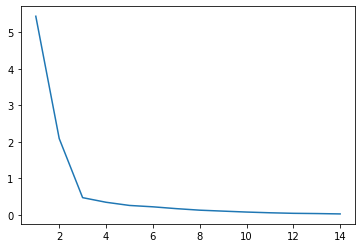

In [32]:
plt.plot(k_rang,sse)